NMFGOT Real Data Demo

In [6]:
import torch
import numpy as np
import scanpy as sc
import anndata
import scipy.io

import sys
sys.path.append('../')
from Code import model
from Code import utils

GC data

In [10]:
mat = scipy.io.loadmat('data/data1.mat')
X1 = mat['X1']
X2 = mat['X2']
label = mat['label'][:,0]
X1 = X1.T
X2= np.log(X2+1).T

# create AnnData object
mic = anndata.AnnData(X1.T,dtype = np.float64)
met = anndata.AnnData(X2.T,dtype = np.float64)
mic.obs['sampletype'] = label

import scipy.io as scio
# read opt similarity
ot_sim = scipy.io.loadmat('../opt_A.mat')
A1 = ot_sim['opt_A1']
A2 = ot_sim['opt_A2']

D:\Users\PC\anaconda3\envs\spyder_hyperGCN_baselines\Lib\site-packages\scipy\io\matlab\_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
D:\Users\PC\anaconda3\envs\spyder_hyperGCN_baselines\Lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
D:\Users\PC\anaconda3\envs\spyder_hyperGCN_baselines\Lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


Run NMFGOT

In [11]:
test_model = model.NMFGOT(mic, met, A1, A2)
test_model.run()

nnsvd W1 done
nnsvd W2 done
D1 done
S1 done
D2 done
S2 done
opt1 done
opt2 done
SNF starts
SNF done
Init done
number of epoch: 1
obj: tensor(122009.5163, device='cuda:0')
number of epoch: 2
obj: tensor(114897.0884, device='cuda:0')
number of epoch: 3
obj: tensor(110383.0200, device='cuda:0')
number of epoch: 4
obj: tensor(107536.5636, device='cuda:0')
number of epoch: 5
obj: tensor(106688.3134, device='cuda:0')
number of epoch: 6
obj: tensor(106535.0342, device='cuda:0')


C:\Users\PC\Desktop\ML_course\NMFGOT-py\Tutorials\..\Code\model.py:199: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  gamma = torch.tensor(gamma).cuda()
C:\Users\PC\Desktop\ML_course\NMFGOT-py\Tutorials\..\Code\model.py:202: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  D1 = torch.tensor(D1).cuda()
C:\Users\PC\Desktop\ML_course\NMFGOT-py\Tutorials\..\Code\model.py:203: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  A1 = torch.tensor(A1).cuda()
C:\Users\PC\Desktop\ML_course\NMFGOT-py\Tutorials\..\Code\model.py:204: UserWarning: To copy cons

number of epoch: 7
obj: tensor(106316.1558, device='cuda:0')
number of epoch: 8
obj: tensor(106053.7250, device='cuda:0')
number of epoch: 9
obj: tensor(105793.7938, device='cuda:0')
number of epoch: 10
obj: tensor(105548.0275, device='cuda:0')
number of epoch: 11
obj: tensor(105317.9978, device='cuda:0')
number of epoch: 12
obj: tensor(105103.1655, device='cuda:0')
number of epoch: 13
obj: tensor(104902.7063, device='cuda:0')
number of epoch: 14
obj: tensor(104715.8350, device='cuda:0')
number of epoch: 15
obj: tensor(104541.7919, device='cuda:0')
number of epoch: 16
obj: tensor(104379.7797, device='cuda:0')
number of epoch: 17
obj: tensor(104228.9321, device='cuda:0')
number of epoch: 18
obj: tensor(104088.3345, device='cuda:0')
number of epoch: 19
obj: tensor(103957.0891, device='cuda:0')
number of epoch: 20
obj: tensor(103834.3968, device='cuda:0')
number of epoch: 21
obj: tensor(103719.6216, device='cuda:0')
number of epoch: 22
obj: tensor(103612.3096, device='cuda:0')
number of e

In [12]:
# Cluster
clu = test_model.cluster()
from sklearn import metrics

AC = metrics.accuracy_score(label, clu, normalize=True)
ARI = metrics.adjusted_rand_score(label, clu)
NMI = metrics.normalized_mutual_info_score(label, clu)
print('AC=: {:.4f}, NMI=: {:.4f}, ARI=: {:.4f}'.format(AC, NMI, ARI))

AC=: 0.8125, NMI=: 0.3733, ARI=: 0.3836


Umap with clustering label

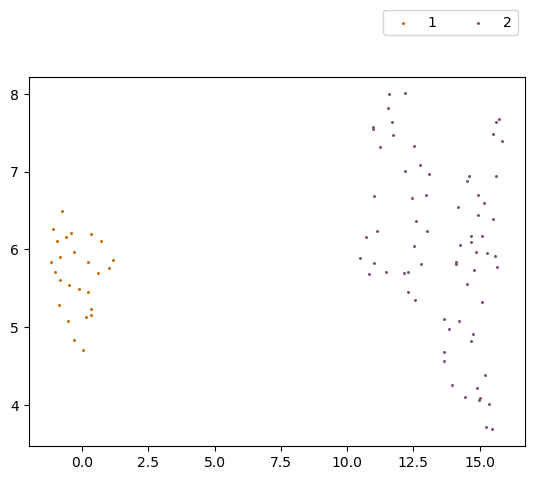

In [13]:
test_model.visualize(clu, min_dist = 0.2, n_neighbors=5)

Umap with true label

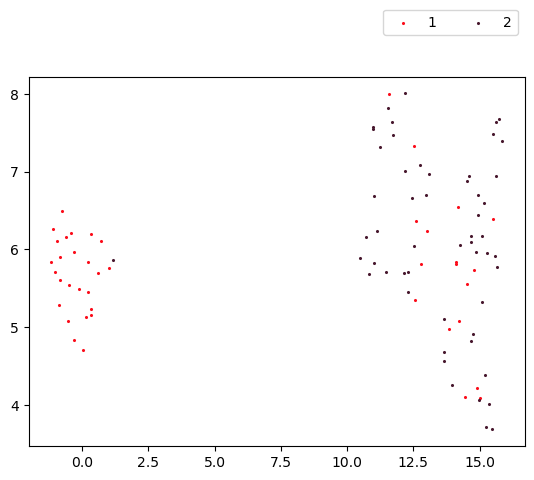

In [14]:
test_model.visualize(label,min_dist = 0.2, n_neighbors=5)